<a href="https://colab.research.google.com/github/hacker-school/juml/blob/main/modul_3_cnn_wiederverwenden_mit_digit_paint_interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laden der Bibliotheken und des gespeicherten NN

Im ersten Schritt bereiten wir alles vor und laden unser bereits trainiertes Modell

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

model = tf.keras.models.load_model('/content/drive/My Drive/modul_2_cnn/model')


2.3.0


# Testen
Wir haben in Modul 2 die Neun schon richtig klassifiziert. Lasst uns überprüfen ob das so auch noch funktioniert.

11493376/11490434 [==============================] - 0s 0us/step


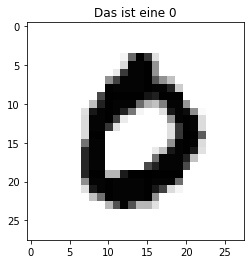

Das NN erkennt die Null als  0  mit einer Wahrscheinlikeit von  0.9999676


In [ ]:
# Wir testen erstmals auf unseren alten Daten um zu testen, ob das Laden funktioniert hat
mnist = keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = np.expand_dims(test_images / 255.0, -1)

# Lade eine 0 aus den Trainingsdaten
indicies_von_allen_0en = (np.where(test_labels == 0))[0]
bild_mit_ziffer_0 = test_images[indicies_von_allen_0en[0]]

plt.figure()
plt.imshow(bild_mit_ziffer_0[:,:,0], cmap=plt.cm.binary)
plt.title("Das ist eine 0")
plt.show()
from scipy.special import softmax
logits_des_nn_fuer_null = model.predict(np.expand_dims(bild_mit_ziffer_0, 0))
wahrscheinlichkeiten_des_nn_fuer_null = softmax(logits_des_nn_fuer_null)[0]
erkannte_klasse_des_nn_fuer_null = np.argmax(wahrscheinlichkeiten_des_nn_fuer_null)
print('Das NN erkennt die Null als ', erkannte_klasse_des_nn_fuer_null, ' mit einer Wahrscheinlikeit von ', wahrscheinlichkeiten_des_nn_fuer_null[erkannte_klasse_des_nn_fuer_null])

# Eigene Ziffer
Kann das Netz auch unsere eigene Ziffer erkennen? Dafür müssen wir die Ziffer zuerst laden, visualisieren und sehen ob das NN sie erkennt :-)

In [ ]:
import IPython
from google.colab import output

def inferDigit(arr):
  global mein_bild_grauwert
  mein_bild = np.array(arr) # Achtung JS liefert diw RGBA-Werte als einfaches Array
  mein_bild_grauwert = mein_bild[0::4] # Jeden 4ten Wert von 0 ab. Also alle R-Werte
  mein_bild_grauwert = np.resize(mein_bild_grauwert, (28,28))
  mein_bild_grauwert = abs(1 - mein_bild_grauwert/255)
  mein_bild_grauwert = np.expand_dims(mein_bild_grauwert, axis=-1)

  plt.figure()
  plt.imshow(mein_bild_grauwert[:,:,0], cmap=plt.cm.binary)
  plt.title("Mein Bild")
  plt.show()

  logits_des_nn = model.predict(np.expand_dims(mein_bild_grauwert, axis=0))
  wahrscheinlichkeiten_des_nn = softmax(logits_des_nn)[0]
  erkannte_klasse_des_nn = np.argmax(wahrscheinlichkeiten_des_nn)
  print('Das NN erkennt mein Bild als ', erkannte_klasse_des_nn, ' mit einer Wahrscheinlikeit von ', wahrscheinlichkeiten_des_nn[erkannte_klasse_des_nn])

  return "OK" # Hier kann auch die Ausgabe an JS delegiert werden

output.register_callback('inferDigit', inferDigit)

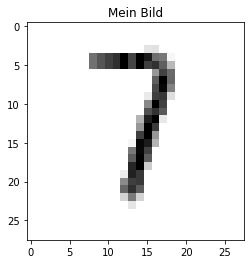

Das NN erkennt mein Bild als  7  mit einer Wahrscheinlikeit von  0.89899933


In [ ]:
IPython.display.HTML('''
<h1>Enter a Digit to read by you NN</h1>
<canvas id="digit" width="28" height="28"></canvas>
<button id = "test-digit">Test Digit</button>
<button id = "clear">clear</button>
<script>
let isDrawing = false
let x = 0
let y = 0
let sc = 4

const digit = document.getElementById('digit')
const test_digit = document.getElementById('test-digit')

const ctx = digit.getContext('2d')

clear.onclick = e =>{
  ctx.fillStyle = 'white'
  ctx.fillRect(0, 0, digit.width, digit.height)
}
clear.click()

test_digit.onclick = e => {
  let digitData = ctx.getImageData(0, 0, 28, 28).data
  digitData = Array.from(digitData)
  ;(async function() {
  let result = await google.colab.kernel.invokeFunction(
    'inferDigit',
    [digitData],
    {})
    console.log(result)
  })()

  return false
}

digit.style.width = 28 * sc + 'px'
digit.style.height = 28 * sc + 'px'
digit.style.border = '1px solid black'

const drawHandler = e => {
  if (isDrawing === true) {
    if (e.type == 'mousemove' || e.type == 'mouseup') {
      ctx.beginPath()
      ctx.strokeStyle = 'black'
      ctx.lineWidth = 2
      ctx.moveTo(x / sc, y / sc)
      ctx.lineTo(e.offsetX / sc, e.offsetY / sc)
      ctx.stroke()
      ctx.closePath()
    }
  } else if (e.type == 'mousedown') {
    isDrawing = true
  }
  x = e.offsetX
  y = e.offsetY
  if (e.type == 'mouseup') {
    x = 0
    y = 0
    isDrawing = false
  }
  e.preventDefault()
}

digit.addEventListener('mousedown', drawHandler)
digit.addEventListener('mousemove', drawHandler)
document.addEventListener('mouseup', drawHandler)
</script>
''')

# Aufgabe Datenformate


*   Wie wichtig ist es, dem Netwerk die gleichen Daten zu zeigen die es bereits während des Trainings sah?
*   Was bedeutet RGB und was ist ein eigentlich ein Grauwertbild?



In [ ]:
mein_bild_grauwert